## 1. Simple Elastix

### Registration

In [1]:
import itk
from itkwidgets import compare, checkerboard
import numpy as np


**Image registration** finds the *spatial transformation that aligns images in the presence of noise*.

In image registration, we typically identify the two images as the fixed and moving image. Our goal is to find the spatial transformation that makes the moving image align with the fixed image.

First, let's load our **fixed image** and the image we will align to our fixed image, the **moving image**.

In [2]:
# Load images with itk floats (itk.F). Necessary for elastix
fixed_image = itk.imread('test1.mha', itk.F)
moving_image = itk.imread('test2.mha', itk.F)

For now we will use a default parametermap of elastix, for more info about parametermaps, see [example2](ITK_Example02_CustomOrMultipleParameterMaps.ipynb#section_id2)

In [3]:
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)

Registration can either be done in one line with the registration function...

In [4]:
# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=False)

In [6]:
# Save image with itk
itk.imwrite(result_image,'exampleoutput/result_image.mha')

In [20]:
import matplotlib.pyplot as plt



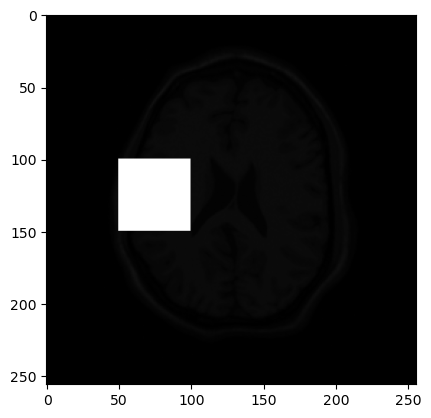

In [44]:
p = plt.imread('exampleoutput/CT_2D_head_fixed.png')
p[100:150, 50:100] = 0.55
plt.imshow(p, cmap='gray')

In [45]:
p = plt.imread('exampleoutput/CT_2D_head_fixed.png')
p[100:150, 50:100] = 0.55
plt.imsave('test1.png', p, cmap='gray')

p = plt.imread('exampleoutput/CT_2D_head_fixed.png')
p[100:150, 150:200] = 0.55
plt.imsave('test2.png', p, cmap='gray')




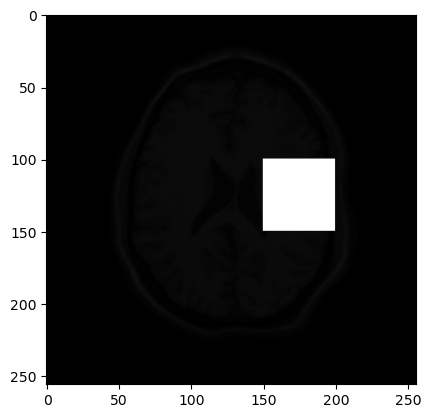

In [51]:
plt.imshow(p, cmap='gray')

The output of the elastix algorithm is the registered (transformed) version of the moving image. The parameters of this transformation can also be obtained after registation.